# IMPORTS:

In [1]:
import pandas as pd
import numpy as np
import re
import string
import emoji
import matplotlib.pyplot as plt

from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim.models.word2vec import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC

%matplotlib inline

# Setting this so we can see the full content of cells
     run cell below only once

In [2]:
pd.set_option('display.max_colwidth', -1) 

# Load And analyse the dataset we created by extracting tweets from twitter using Tweepy API

In [3]:
tweets = pd.read_csv('TweetlabelledFinal.csv')
tweets.head(50)

,ID,Date- Time,User_Name,Tweet,Sentiment
0,1286896213657346050,2020-07-25 05:29:01,BALLl,"i need to make my own SapceX, some people dont deserve to live here",positive
1,1286905185273610241,2020-07-25 06:04:40,T:HE:JAMES. HMRH,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM",neutral
2,1287391022218006531,2020-07-26 14:15:12,Anshi Pathak,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.,positive
3,1287495418180501505,2020-07-26 21:10:02,Goodauld69th,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds,negative
4,1287731665452769280,2020-07-27 12:48:48,Sardar Khan,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....,negative
5,1287756489428353025,2020-07-27 14:27:27,guapdaddy 3000,someone get me the panda pegion nike sb,neutral
6,1287756655413911554,2020-07-27 14:28:06,who?????me,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE",negative
7,1287773079675056128,2020-07-27 15:33:22,The Great Gay Trainwreck,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area,negative
8,1287775000041271296,2020-07-27 15:41:00,Dawood Javed,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB",positive
9,1287808107817689090,2020-07-27 17:52:33,Xavier Dolanigga,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.,positive


In [4]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29348 entries, 0 to 29347
Data columns (total 5 columns):
ID            29348 non-null int64
Date- Time    29348 non-null object
User_Name     29345 non-null object
Tweet         29348 non-null object
Sentiment     29348 non-null object
dtypes: int64(1), object(4)
memory usage: 1.1+ MB


    The dataset contains attributes : Tweet , tweet id , data time , username & sentiment , out of these we only need
    tweet and sentiment for our supervised machine learning classification algorithm

In [5]:
tweets= tweets[['Sentiment','Tweet']]
tweets.head(50)

,Sentiment,Tweet
0,positive,"i need to make my own SapceX, some people dont deserve to live here"
1,neutral,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM"
2,positive,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.
3,negative,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,negative,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....
5,neutral,someone get me the panda pegion nike sb
6,negative,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE"
7,negative,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area
8,positive,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB"
9,positive,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.


    As the sentiment is given in string format we need to convert them into numerical values which will serve as the
    class labels for the supervised machine learning algorithm.

In [6]:
Sentiment = {'negative': 0,'positive': 1,'neutral' : 2}
tweets.Sentiment = [Sentiment[item] for item in tweets.Sentiment]
tweets.head(50)

,Sentiment,Tweet
0,1,"i need to make my own SapceX, some people dont deserve to live here"
1,2,"Thre was mention of this earlier, the infraction on the views of the cosmos from the SapceX array and how astronomy would compensate. https://t.co/I5omeFq4SM"
2,1,@bhab005 @KanganaTeam @kunalpande8 Sachine Tendulkar handle his account and but here kangana team handles her. That's the difference here. And if she is doing that what's funny. She has earned that right. Also Jo log khud nahi bolte h wo dusron se bulwate Hain. Wo khud bol rahi h to galat. Kya h.
3,0,Mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,0,@gareebscientist @GauravG91 @Chandel1402 @isro @SpaceX He I mean... Vaibhav....spacex is doing great work.. But its unfair to compare two.. No offense to sapcex but I will chose ISRO over spacex AnyDay....
5,2,someone get me the panda pegion nike sb
6,0,"Piers Morgan, A Scum Media ""Star"" Showing His Spitefull Side. What a Pathetic Little Man. https://t.co/fKIRzd7aGE"
7,0,Old PC game skyboxes emit such elegiac auras\njust look at like\nThe skybox from the Harry potter 2 qudditch area
8,1,"""Fantastic Beasts: The Crimes of Grindelwald, Gellert Grindelwald plans to raise an army of wizards to rule over non-magical beings. In response, Newt Scamander's former professor, Albus Dumbledore, seeks his help to stop him.""\n#FantasticBeastsTheCrimesOfGrindelwald https://t.co/KmVVV9z7FB"
9,1,@Selinakyle981 @filmsbyzoe also Kit Harrigton is good in this movie. I don't care what anybody says.


# Cleaning Data

        From the tweets we need to remove:
        1. mentions or usernames : @abcd
        2. Hashtags : #happy --> happy
        3. convert all tweets in Lowercase :
                this is done because upeercase and lower case charecters are treated as differnt as a result 
                while converting a word in vector , same words may give different vectors if the casing of the letters
                in the words varies.
        4. Remove extra white spaces
        5. Remove numbers/digits
        6. Remove Hyperlinks
        7. Remove New Lines

        re.sub(r'@[A-za-z0-9]+','',text) :
            r: tells python the text is raw text
            @[A-za-z0-9]+ : any pattern starting with @ and followed by letterts or alphabet one or more.
            
        'http?s:\/\/\S+' : remove http, '?s' means s may or may not be present folowwed by // till we  
                               get one or more white space denoted by'S+'

In [7]:
# create a function to clean text
def cleanTxt(text):
    text= re.sub(r'@[A-za-z0-9]+','',text) # remove mentions
    text= re.sub(r'#','',text) # remove # from text
    text= re.sub(r'http?s:\/\/\S+','',text) # remove Hyperlink
    text= re.sub(r'\n',' ',text) # remove new line
    text = re.sub(r'\d+','', text) # remove numbers
    
    # remove punctuations and convert characters to lower case
    text = "".join([char.lower() for char in text if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text = re.sub('\s+', ' ', text).strip()
    
    return text

# Apply cleanTxt to our data

In [8]:
tweets['Tweet']= tweets['Tweet'].apply(cleanTxt)
tweets.head(50)

,Sentiment,Tweet
0,1,i need to make my own sapcex some people dont deserve to live here
1,2,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,1,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,0,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,0,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday
5,2,someone get me the panda pegion nike sb
6,0,piers morgan a scum media star showing his spitefull side what a pathetic little man
7,0,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area
8,1,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald
9,1,also kit harrigton is good in this movie i dont care what anybody says


# The Tweets Still contains Emoji 😉  

    we can either remove them or replace them with equivalent text as sometimes these emoji do carry valuable
    sentiments/information 
    example:
    The food was 😍 : the emoji suggest the food was good (positive sentiment)
    The food was 😑 : the emoji sugeest the food was bad or average (negative sentiment)
    without emoji the text "The food was" seems to be Neutral
    
    Therefore its better to retain the emoji by converting them to text in order to retain the actual sentiment 
    
    Note:
    while replcaing emoji , emoji that are represented by multiple words ex: Happy_face or red-heart
    so we also need to replace the "_", "-" with blank space.
    
    delimiters=("", "") : by default delimeters are : , : i.e the text for emoji will place between two colons
                          so replace the colon with empty string.

In [9]:
def convertEmoji(text):
    text = emoji.demojize(text, delimiters=("", ""))
    text = re.sub(r'_',' ', text) # replace underscore with single white space
    text = re.sub(r'-',' ', text) # replace '-' with single white space
    return text

# Apply emoji conversion to our data

In [10]:
tweets['Tweet']= tweets['Tweet'].apply(convertEmoji)
tweets.head(50)

,Sentiment,Tweet
0,1,i need to make my own sapcex some people dont deserve to live here
1,2,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,1,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,0,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,0,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday
5,2,someone get me the panda pegion nike sb
6,0,piers morgan a scum media star showing his spitefull side what a pathetic little man
7,0,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area
8,1,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald
9,1,also kit harrigton is good in this movie i dont care what anybody says


# Now the Text free from mentions/Usernames , # , Hyperlinks and emojis are replaced with their meanings

      also as the emoji are now converted to words , the sentiment of the tweet might change hence lets update 
      the sentiment accordingly

In [11]:
def get_tweet_sentiment(tweet): 
    
    # create TextBlob object of passed tweet text 
    analysis = TextBlob(tweet)
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return 1
    elif analysis.sentiment.polarity == 0: 
        return 2
    else: 
        return 0

In [12]:
tweets['Sentiment']= tweets['Tweet'].apply(get_tweet_sentiment)
tweets.head(50)

,Sentiment,Tweet
0,1,i need to make my own sapcex some people dont deserve to live here
1,2,thre was mention of this earlier the infraction on the views of the cosmos from the sapcex array and how astronomy would compensate
2,1,sachine tendulkar handle his account and but here kangana team handles her thats the difference here and if she is doing that whats funny she has earned that right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h to galat kya h
3,0,mainly stoltenberg scandanavian cowardly attacks oil pipe lines then running like weird inbred fish savages to underground bunkers i wont dive into it but that world is over and like nazis there being spitefull and abusive and fucking everything up because there dumb inbreds
4,0,he i mean vaibhavspacex is doing great work but its unfair to compare two no offense to sapcex but i will chose isro over spacex anyday
5,2,someone get me the panda pegion nike sb
6,0,piers morgan a scum media star showing his spitefull side what a pathetic little man
7,0,old pc game skyboxes emit such elegiac auras just look at like the skybox from the harry potter qudditch area
8,1,fantastic beasts the crimes of grindelwald gellert grindelwald plans to raise an army of wizards to rule over nonmagical beings in response newt scamanders former professor albus dumbledore seeks his help to stop him fantasticbeaststhecrimesofgrindelwald
9,1,also kit harrigton is good in this movie i dont care what anybody says


# Now to Normailze the text , convert the text into tokens and perfrom stemming

    Tokenizing: Turning the tweets into tokens. Tokens are words separated by spaces in a text.
    
    Normalization: Normalization generally refers to a series of related tasks meant to put all text on the same level.
                   Converting text to lower case, removing special characters, and removing stopwords will remove basic
                   inconsistencies. Normalization improves text matching.
                   
                   we have already done majority of normalization ,only stopwords removal remians.
            
     Stopword removal: Some words do not contribute much to the machine learning model, so it's good to remove them.
                       
     Stemming: Eliminating affixes (circumfixes, suffixes, prefixes, infixes) from a word in order to obtain a word stem.
               Porter Stemmer is the most widely used technique because it is very fast.
               Generally, stemming chops off end of the word, and mostly it works fine.
               Example: Working -> Work
               
     Lemmatization: The goal is same as with stemming, but stemming a word sometimes loses the actual meaning of the word.
                    Lemmatization usually refers to doing things properly using vocabulary and morphological analysis of
                    words. It returns the base or dictionary form of a word, also known as the lemma .
                Example: Better -> Good.
                
      Here i am going to use lemmatization
      
      syntax .lemmatize(word, pos='a'):
              pos : part of speech tag , defualt : n (Noun)
              pos = 'a' : adjective 
              example:
              lemmatize('better',pos='a')==> good

In [13]:
def Tokenization(tweet):
    
    #convert to tokens and filter out stopwords
    stop_words = set(stopwords.words('english'))
    tweet_tokens = word_tokenize(tweet) 
    filtered_words = [w for w in tweet_tokens if not w in stop_words]
    
    
    lemmatizer = WordNetLemmatizer()
    lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in filtered_words]
    
    return " ".join(lemma_words)

# Apply Tokenization to the Tweets

In [14]:
tweets['Tweet_Tokenized']= tweets['Tweet'].apply(Tokenization)
tweets.tail(200)

,Sentiment,Tweet,Tweet_Tokenized
29148,1,chelsea vs rennes live stream free tv channel kickoff time and team news for champions league group game tonight,chelsea vs rennes live stream free tv channel kickoff time team news champions league group game tonight
29149,0,dow rallies points amid tight election race tech rally pushes nasdaq up,dow rallies points amid tight election race tech rally pushes nasdaq
29150,2,what human rights are sacrificed under donald trump,human rights sacrificed donald trump
29151,2,well its been years and im still iffy about donald trump,well years im still iffy donald trump
29152,1,joe biden chacha right now elections,joe biden chacha right elections
29153,1,good project thumbs up btf cryptocurrencies bitcoin defi hodl,good project thumbs btf cryptocurrencies bitcoin defi hodl
29154,2,stop ignoring putins hackers,stop ignoring putins hackers
29155,2,donald trump will never concede,donald trump never concede
29156,2,cry me a river meet the boss man joe biden,cry river meet boss man joe biden
29157,2,i wrote about the role tech companies and news outlets could play in helping him scam his way to an illegitimate second term,wrote role tech companies news outlets could play helping scam way illegitimate second term


In [15]:
tweets_array = tweets['Tweet_Tokenized'].values
tweets_array

array(['need make sapcex people dont deserve live',
       'thre mention early infraction views cosmos sapcex array astronomy would compensate',
       'sachine tendulkar handle account kangana team handles thats difference whats funny earned right also jo log khud nahi bolte h wo dusron se bulwate hain wo khud bol rahi h galat kya h',
       ...,
       'baat achhi hai bjp needs ensure safety wellbeing congress minister already cleared one team formed harass arnab goswami',
       'mohamed salah rates liverpools champions league chances rio ferdinand backs reds',
       'people used think arnab spokesman bjp well people wrong bjp spokesperson arnab goswami'],
      dtype=object)

In [16]:
tweets_label =tweets['Sentiment'].values
tweets_label

array([1, 2, 1, ..., 2, 2, 0], dtype=int64)

    Now all we have a single array of tweets and each tweet serves as an unique element of the array.
    However to convert tweets into vectors we need each word in a tweets as a seperate element or token.
    hence applying Word_Tokenizer on the elements of your tweet array to get the required result.

In [17]:
Tokenized_Tweet = [word_tokenize(tweet) for tweet in tweets_array]
Tokenized_Tweet

[['need', 'make', 'sapcex', 'people', 'dont', 'deserve', 'live'],
 ['thre',
  'mention',
  'early',
  'infraction',
  'views',
  'cosmos',
  'sapcex',
  'array',
  'astronomy',
  'would',
  'compensate'],
 ['sachine',
  'tendulkar',
  'handle',
  'account',
  'kangana',
  'team',
  'handles',
  'thats',
  'difference',
  'whats',
  'funny',
  'earned',
  'right',
  'also',
  'jo',
  'log',
  'khud',
  'nahi',
  'bolte',
  'h',
  'wo',
  'dusron',
  'se',
  'bulwate',
  'hain',
  'wo',
  'khud',
  'bol',
  'rahi',
  'h',
  'galat',
  'kya',
  'h'],
 ['mainly',
  'stoltenberg',
  'scandanavian',
  'cowardly',
  'attacks',
  'oil',
  'pipe',
  'lines',
  'running',
  'like',
  'weird',
  'inbred',
  'fish',
  'savages',
  'underground',
  'bunkers',
  'wont',
  'dive',
  'world',
  'like',
  'nazis',
  'spitefull',
  'abusive',
  'fucking',
  'everything',
  'dumb',
  'inbreds'],
 ['mean',
  'vaibhavspacex',
  'great',
  'work',
  'unfair',
  'compare',
  'two',
  'offense',
  'sapcex',
 

# Convert Tweets into vectors:

# what is word embeddins , CBow And Skip-gram ?
    
    ref : https://towardsdatascience.com/introduction-to-word-embedding-and-word2vec-652d0c2060fa

    Word embeddings are vector representations of a particular word.
    Word embedding is one of the most popular representation of document vocabulary. 
    It is capable of capturing context of a word in a document, semantic and syntactic similarity, 
    relation with other words, etc.
    
    The objective is to have words with similar context occupy close spatial positions. 
    Mathematically, the cosine of the angle between such Word vectors should be close to 1, i.e. angle close to 0.
    
    Word embedding using word2vec can be obtained using two methods (both involving Neural Networks)
    Skip Gram and Common Bag Of Words (CBOW)

    CBOW Model: This method takes the context of each words/vectors of V dimension as the input and tries to predict a word
    corresponding to the context of V dimension.
    ex: The sentence = Have a great day!
        input/context words : have , a , great
        output/target word : day
       
![](Cbow.png)

    Skip- Gram : For each context words/vector of Dimension V we give as an input , we get c(window size) T
    arget words of dimension V.
     ex: The sentence = Have a great day!
         input/context word : great
         output/target words : have , a , day
         
![](skipgram.png)

# Build Word2Vec Model

    parameter sg = 0 (default) means we are using Cbow
              sg = 1 , means we are using Skip grams
              size : the size of the vector we want
              sentences : the tweets we want to convert into indiviual vectors
              window : the number of adjacent neighbours to consider while using the Word2Vec Model.
              Min_count : the minimum frequency of a word in the all the sentences for the Model to consider and 
                          include it in the vocabulary.
                          ex : if min_count = 5
                               the word 'rain' appears less than 5 times in all tweets , 
                               'rain' wont be included in the vocabulary

In [18]:
Encoding_dim= 225  # size of vector we are converting each word token into.
model_cbow = Word2Vec(sentences=Tokenized_Tweet,window=5,min_count=5,size=Encoding_dim)
model_sg = Word2Vec(sentences=Tokenized_Tweet,window=5,min_count=5,size=Encoding_dim,sg=1)

# Train Word2Vec Models

In [19]:
model_cbow.train(Tokenized_Tweet, total_examples= len(Tokenized_Tweet),epochs=50)

(16331387, 19706300)

In [20]:
model_sg.train(Tokenized_Tweet, total_examples= len(Tokenized_Tweet),epochs=50)

(16330532, 19706300)

# Checking the number of Words we have in the created vocabulary 
    
    The number of unique words our word2vec model has identified and converted into vectors of length 225.

In [21]:
words_cbow=list(model_cbow.wv.vocab)
len(words_cbow)

9197

In [22]:
words_sg=list(model_sg.wv.vocab)
len(words_sg)

9197

# Test Models using similarity method

In [23]:
word = 'machine'
model_cbow.wv.most_similar(word,topn = 20)

[('learning', 0.5979888439178467),
 ('python', 0.5182476043701172),
 ('ai', 0.5143947005271912),
 ('artificialintelligence', 0.4970901608467102),
 ('machinelearning', 0.4919191896915436),
 ('tensorflow', 0.4833938777446747),
 ('deeplearning', 0.4790056049823761),
 ('segmentation', 0.4789063632488251),
 ('datascience', 0.47679877281188965),
 ('developer', 0.4588560163974762),
 ('javascript', 0.44089189171791077),
 ('daysofcode', 0.42767134308815),
 ('startup', 0.41915491223335266),
 ('physics', 0.4171716570854187),
 ('dl', 0.4166650176048279),
 ('devices', 0.4152623414993286),
 ('pytorch', 0.4149036705493927),
 ('programming', 0.41370922327041626),
 ('deep', 0.4125607907772064),
 ('writingcommunity', 0.4083246886730194)]

In [24]:
word = 'artificial'
model_sg.wv.most_similar(word,topn = 20)

[('intelligence', 0.9130021333694458),
 ('artificialintelligence', 0.5045976638793945),
 ('mimics', 0.48775288462638855),
 ('ai', 0.46392014622688293),
 ('intoainews', 0.4468849003314972),
 ('pharma', 0.4454767107963562),
 ('fintech', 0.44431427121162415),
 ('predicting', 0.4250364601612091),
 ('daysofcode', 0.42240431904792786),
 ('dl', 0.4208865761756897),
 ('renaissance', 0.4144133925437927),
 ('segmentation', 0.4142898917198181),
 ('coding', 0.3954581320285797),
 ('blockchain', 0.3928234577178955),
 ('pytorch', 0.3926376402378082),
 ('python', 0.39255058765411377),
 ('bigdata', 0.3885931372642517),
 ('neuralnetwork', 0.38473138213157654),
 ('construct', 0.38199901580810547),
 ('applied', 0.38050225377082825)]

# after evaluation of CBoW nd Skip Gram 

    i decided to continue with CBoW 

# Preparing Vectors of Tweets for our classifier

    Since our data contains tweets and not just words, we need to use the word vectors from word2vec model to create
    vector representation for an entire tweet.
    so to create a vector representing an entire tweet, we simply take mean of all the word vectors present in the tweet.
    The length of the resultant vector will be the same( i.e. Encoding_dim) 
    The process is repeated for all the tweets in our data in order to obtain their corressponding vectors.

In [25]:
len(Tokenized_Tweet) # no of tokenized tweets

29348

# lets see how the tweets looks after being converted into list of tokens

In [26]:
print(Tokenized_Tweet[0]) # view the tweet token of the tweet at index 0
print(Tokenized_Tweet[1]) # view the tweet token of the tweet at index 1

['need', 'make', 'sapcex', 'people', 'dont', 'deserve', 'live']
['thre', 'mention', 'early', 'infraction', 'views', 'cosmos', 'sapcex', 'array', 'astronomy', 'would', 'compensate']


In [27]:
model_cbow.wv['sad']  # vector representation of a token or word in a tweet

array([ 1.004338  ,  0.27884057, -0.7056386 , -0.40404215,  1.4185158 ,
       -0.39843926, -0.6184998 ,  0.41405445, -0.76336545,  0.08719177,
       -0.8919954 , -0.74856025, -0.4799165 ,  0.3148121 ,  1.6419113 ,
       -0.93059456, -0.35182962,  1.391968  , -2.2512245 , -0.6731917 ,
       -0.6545812 ,  0.5670674 , -0.10561126, -1.6407723 , -0.18270741,
       -0.3293092 , -0.282453  , -0.7575173 ,  0.60597396,  0.36679223,
       -2.1617227 , -0.14040291,  0.30850452,  0.1724599 , -0.01348394,
       -0.2243429 ,  0.07505868, -1.6545972 , -0.9568476 , -0.8250819 ,
        1.3654121 ,  1.5311387 ,  0.26129645, -0.16224007,  1.8667996 ,
       -0.45713726, -1.9338038 ,  0.34289917, -1.1465211 , -0.05848906,
       -0.6770549 ,  1.3466448 ,  0.07787258, -0.14971097,  0.03256267,
       -0.35036758,  2.1227624 ,  0.30728367,  1.5211561 , -0.11391378,
        1.3703771 ,  0.04276436, -0.77282155, -0.1379203 ,  0.14210282,
        2.5335798 ,  0.70119375,  0.6689275 , -0.94045234, -0.69

In [28]:
len(model_cbow.wv['king']) # length of word/ token in tweet

225

# Function to convert a tweet(broken into tokens) into a vector of size 225

In [29]:
def Tweet_vector(Tweet_tokenized):
    vector = np.zeros(Encoding_dim).reshape((1,Encoding_dim)) # 1 row ; size columns
    count = 0
    for token in Tweet_tokenized:
        try:
            vector += model_cbow.wv[token].reshape((1,Encoding_dim))  # 1 row ; Size columns
            count += 1
        except KeyError:  # handling the case where the token is not in vocabulary
            continue      # simply ignore such case
            
    if count != 0:
        vector /= count
        
    return vector

# convert each tweet into an individual vector of size 225

    so after this we should have a dataset with:
    Number of rows = number of tweets
    Number of columns = Encoding_Dim (size of each vector representation an individual tweet)

In [30]:
Tweetvec_array = np.zeros((len(Tokenized_Tweet), Encoding_dim)) #numpy array of all zeros; contains cols = encoding_dim and rows= no of tweets

#populating the array with corressponding vector representation of tweets
for i in range(len(Tokenized_Tweet)):
    Tweetvec_array[i,:] = Tweet_vector(Tokenized_Tweet[i])  #[i,:] ith row ; ':' means all columns

In [31]:
Tweetvector = pd.DataFrame(Tweetvec_array)
Tweetvector.shape

(29348, 225)

In [32]:
Tweetvector.loc[0] #print content of entire row with index 0

0      0.817877
1      1.432254
2      0.363570
3     -0.309338
4     -1.096685
5     -0.995644
6     -1.254976
7      0.215907
8     -0.162495
9      0.157340
10     0.692640
11    -0.945204
12    -0.030611
13     0.731782
14     0.809958
15     0.529591
16    -0.379408
17     0.467954
18    -0.610880
19     0.161241
20    -0.541638
21    -0.260280
22     0.316765
23    -0.422912
24    -0.081314
25     0.214392
26    -0.369229
27     0.301516
28    -0.764310
29    -0.026836
         ...   
195   -0.640787
196   -1.064072
197    0.722097
198   -0.073014
199   -0.387816
200   -0.219368
201    0.306234
202    0.799231
203   -0.350603
204   -0.852184
205   -0.695551
206    0.004794
207   -0.413762
208    0.754193
209    0.078255
210    0.782817
211   -0.524252
212    1.094811
213   -0.141211
214   -0.444128
215    0.133686
216    0.192441
217    0.151021
218    0.131588
219   -0.033487
220    0.643215
221    0.355040
222   -0.272265
223   -0.174932
224    0.910907
Name: 0, Length: 225, dt

In [33]:
tweets_label.shape  # lables

(29348,)

In [34]:
Tweetvector.shape # vector representation of tweets

(29348, 225)

# Finally the Data is ready to be used to train a Classification Algorithm

    Here we are going to support vector machine
    and for the multiclass classification we are going to the polynomial kernal of the Supoort vector Classifer (SVC)

# Split data into training and test sets :

In [35]:
Tweet_train, Tweet_test, sentiment_train, sentiment_test = train_test_split(Tweetvector, tweets_label, random_state=101, test_size=0.20)

In [36]:
print(Tweet_train.shape)
print(Tweet_test.shape)
print(sentiment_train.shape)
print(sentiment_test.shape)

(23478, 225)
(5870, 225)
(23478,)
(5870,)


# Parameters of the model

    C: regularization parameter;
       it trades off misclassification of training examples against simplicity of the decision surface.
       A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly.
       
    gamma : {‘scale’, ‘auto’} or float, default=’scale’
            Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
            if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
            if ‘auto’, uses 1 / n_features.
    
    kernel: Specify the type of kernel to be used.
            {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
            
    degree: int value, default=3
            Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
            
    random_state : to account for reproduceable results
    
    max_iter : the maximum number of iteration the algorithm is allowed to perform in order to corverge(minimize the cost)

In [38]:
training_accuracy = []
test_accuracy = []
C = [0.01,0.1,0.25,0.5,0.75,1.0,1.25,1.5,2.0,2.5]

for c in C:
    clf = SVC(kernel ='poly',C=c, degree=2,gamma='scale',max_iter=30000,random_state=101)
    clf.fit(Tweet_train,sentiment_train)
    test_accuracy.append( accuracy_score(sentiment_test, clf.predict(Tweet_test)) )
    training_accuracy.append( accuracy_score(sentiment_train, clf.predict(Tweet_train)) )
    print ("Accuracy for training set with regularization parameter C = %s is : %.3f" % (c, accuracy_score(sentiment_train, clf.predict(Tweet_train))))
    print ("Accuracy for test set with regularization parameter C = %s is : %.3f" % (c, accuracy_score(sentiment_test, clf.predict(Tweet_test))))
    print ("\n")


Accuracy for training set with regularization parameter C = 0.01 is : 0.442
Accuracy for test set with regularization parameter C = 0.01 is : 0.434


Accuracy for training set with regularization parameter C = 0.1 is : 0.690
Accuracy for test set with regularization parameter C = 0.1 is : 0.661


Accuracy for training set with regularization parameter C = 0.25 is : 0.742
Accuracy for test set with regularization parameter C = 0.25 is : 0.695


Accuracy for training set with regularization parameter C = 0.5 is : 0.779
Accuracy for test set with regularization parameter C = 0.5 is : 0.714


Accuracy for training set with regularization parameter C = 0.75 is : 0.800
Accuracy for test set with regularization parameter C = 0.75 is : 0.725


Accuracy for training set with regularization parameter C = 1.0 is : 0.815
Accuracy for test set with regularization parameter C = 1.0 is : 0.727


Accuracy for training set with regularization parameter C = 1.25 is : 0.826
Accuracy for test set with reg

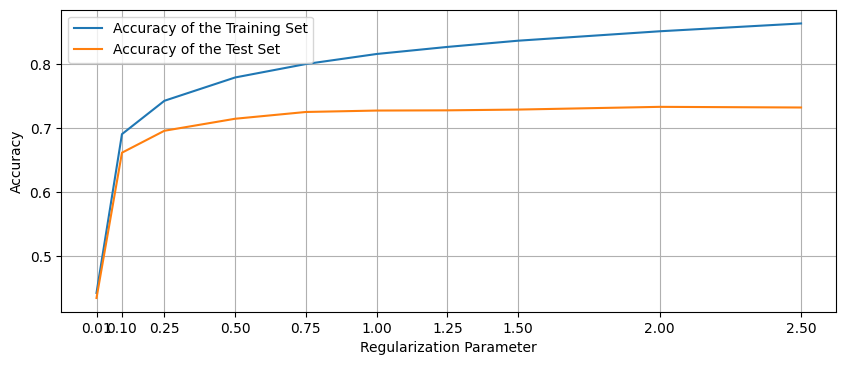

In [39]:
my_dpi = 100 # dots per inch .. (resolution)
plt.figure(figsize=(1000/my_dpi, 400/my_dpi), dpi = my_dpi) # to enlarge the plot (can be omitted)

plt.plot(C, training_accuracy, label = 'Accuracy of the Training Set')
plt.plot(C, test_accuracy, label = 'Accuracy of the Test Set')
plt.ylabel('Accuracy')
plt.xticks(C)
plt.xlabel('Regularization Parameter')
plt.legend()
plt.grid()

# using one vs rest to compare results with count vectorizer

In [40]:
for c in [0.01,0.1,0.25,0.5,0.75,1.0,1.25,1.5]:
    clf = OneVsRestClassifier(LinearSVC(C=c,max_iter=20000,random_state=101),n_jobs = 1)
    clf.fit(Tweet_train,sentiment_train)
    print ("Accuracy for training set with regularization parameter C = %.3f is : %.3f" % ( c,accuracy_score(sentiment_train, clf.predict(Tweet_train))))
    print ("Accuracy for test set with regularization parameter C = %.3f is : %.3f" % (c, accuracy_score(sentiment_test, clf.predict(Tweet_test))))
    print ("\n")


Accuracy for training set with regularization parameter C = 0.010 is : 0.664
Accuracy for test set with regularization parameter C = 0.010 is : 0.661


Accuracy for training set with regularization parameter C = 0.100 is : 0.665
Accuracy for test set with regularization parameter C = 0.100 is : 0.660


Accuracy for training set with regularization parameter C = 0.250 is : 0.665
Accuracy for test set with regularization parameter C = 0.250 is : 0.660


Accuracy for training set with regularization parameter C = 0.500 is : 0.665
Accuracy for test set with regularization parameter C = 0.500 is : 0.660


Accuracy for training set with regularization parameter C = 0.750 is : 0.665
Accuracy for test set with regularization parameter C = 0.750 is : 0.659


Accuracy for training set with regularization parameter C = 1.000 is : 0.665
Accuracy for test set with regularization parameter C = 1.000 is : 0.659


Accuracy for training set with regularization parameter C = 1.250 is : 0.665
Accuracy fo

# The Value of C (Regularization Parameter)  selected for this model = 0.75

        observations:
        value of degree = 2 is best , increasing to 3 overfits the model as training accuracy is 90%+ 
        but test set accuracy is below 50%
        
        value of regularization parameter 'C' is not increased beyond 2.5, as after doing so the model fails to converge
        even after 30,000 iterations

In [42]:
clf = SVC(kernel ='poly',C=0.75, degree=2,gamma='scale',max_iter=20000,random_state=101)
clf.fit(Tweet_train,sentiment_train)
print ("Accuracy for training set with regularization param C= 0.75 is : %.3f" % ( accuracy_score(sentiment_train, clf.predict(Tweet_train))))
print ("Accuracy for test set with regularization param C= 0.75 is : %.3f" % ( accuracy_score(sentiment_test, clf.predict(Tweet_test))))
print ("\n") 

Accuracy for training set with regularization param C= 0.75 is : 0.800
Accuracy for test set with regularization param C= 0.75 is : 0.725




# Making Predictions and Evaluating the Classifier 

In [43]:
sentiment_test

array([0, 1, 0, ..., 2, 1, 0], dtype=int64)

In [44]:
sentimentdf=  pd.DataFrame( sentiment_test)

# Function to Convert numeric labels to their String equivalent

In [45]:
def convert_sent(number):
    if number == 2 :
        return 'Neutral'
    elif number == 1:
        return 'positive'
    else :
        return 'negetive'

# Making Prediction of sentiments on test set and comparing with actual sentiments

In [46]:
predictions = clf.predict(Tweet_test)
Id = sentimentdf.index
predicted_sentiments = pd.DataFrame(predictions, Id , columns = ['Predicted_sentiments'])
actual_sentiments = pd.DataFrame(sentiment_test, Id, columns = ['Actual_sentiments'])
predictions_comparions=actual_sentiments.merge(predicted_sentiments, how = 'outer', left_index = True, right_index = True)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,0,0
1,1,1
2,0,2
3,2,2
4,1,0
5,1,1
6,0,0
7,2,2
8,0,1
9,0,0


In [47]:
predictions_comparions['Actual_sentiments'] =predictions_comparions['Actual_sentiments'].apply(convert_sent)
predictions_comparions['Predicted_sentiments'] =predictions_comparions['Predicted_sentiments'].apply(convert_sent)
predictions_comparions.head(10)

,Actual_sentiments,Predicted_sentiments
0,negetive,negetive
1,positive,positive
2,negetive,Neutral
3,Neutral,Neutral
4,positive,negetive
5,positive,positive
6,negetive,negetive
7,Neutral,Neutral
8,negetive,positive
9,negetive,negetive


In [48]:
predictions_comparions.groupby(['Actual_sentiments']).count()

,Predicted_sentiments
Actual_sentiments,
Neutral,1850
negetive,1920
positive,2100


# Confusion Matrix And calculating Precision Recall and F1 Score

    In the Confusion Matrix : Negetive = 0 ; Positive = 1 ; Neutral = 2 (class Labels)
                Row represents actual Sentiments while the columns represents the predicted sentiments
                
                1st row : 1st column :Actual Sentiment = Negetive ; Predicted Sentiment = Negetive
                1st row : 2nd column :Actual Sentiment = Negetive ; Predicted Sentiment = Positive
                1st row : 3rd column :Actual Sentiment = Negetive ; Predicted Sentiment = Neutral
                
                2nd row : 1st column :Actual Sentiment = Positive ; Predicted Sentiment = Negetive
                2nd row : 2nd column :Actual Sentiment = Positive ; Predicted Sentiment = Positive
                2nd row : 3rd column :Actual Sentiment = Positive ; Predicted Sentiment = Neutral
                
                3rd row : 1st column :Actual Sentiment = Neutral ; Predicted Sentiment = Negetive
                3rd row : 2nd column :Actual Sentiment = Neutral ; Predicted Sentiment = Positive
                3rd row : 3rd column :Actual Sentiment = Neutral ; Predicted Sentiment = Neutral

In [49]:
cm  = confusion_matrix(sentiment_test,predictions )
print(cm)

[[1384  356  180]
 [ 326 1599  175]
 [ 297  282 1271]]


# Precision Recall & F1 Score:

    Precison = True Postive/(Total predicted Positive) || True Postive/(True Positive + False Positive)
               Precision talks about how precise/accurate the model is, i.e. out of total predicted positive,
               how many of them are actual positive.
               
    Recall = True Positive/(Total actual Positive) || True Postive/(True Positive + False Negetive)
             Recall calculates how many of the Actual Positives the model captures by labeling it 
             as Positive (True Positive)
             
    F1 Score = (2 * Precision * Recall) / (Precision + Recall)

In [50]:
precision = precision_score(sentiment_test, predictions, average='macro')
print('Precision of the Classifier Model : %.3f' % precision)
recall = recall_score(sentiment_test, predictions, average='macro')
print('Recall of the Classifier Model : %.3f' %recall)
f1 = f1_score(sentiment_test, predictions, average='macro')
print('F1 Score of the Classifier Model : %.3f' %f1)

Precision of the Classifier Model : 0.729
Recall of the Classifier Model : 0.723
F1 Score of the Classifier Model : 0.725


# PREDICT SENTIMENT FROM CUSTOM TWEETS
    (Tweets not in the dataset , neither in training nor in test set)

    Test case 1:
            "its a sad night for @RealMadridCF we lost the game 2-1, but we will come back stronger next time #Hala_Madrid",
             "@SDER You are a bully,you deserverd to be punished",
             "yes,, @IndianCricket team are the champions of the world 😍 #WINNERS #WORLDCHAPMPS",
             " THE FOOD WAS ENJOYABLE 😊 😊",
             "rest in peace !! #RIP 😢 😢"
             
     Test Case 2:
             "Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
             "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
             "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
             "The food could not have been more bad, One of the worst restaurant i have dined at ,
             the food actually teatsed like shit",
             "Machine learning is one of the most intersteing feilds to work on",
             " The movie was a bit boring and not so intersting for me also it was slow,
             overall it was below average !!! #Chappak"
             
      Test Case 3: ... save the test case here for future references

In [51]:
User_Tweets = ["Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT",
             "@iamrohit you were right ...Kolkata is rightfully called the City of Joy..",
             "Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend",
             " The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit",
             "Machine learning is one of the most intersteing feilds to work on",
             " The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak"
             ]

IP_Tweets =  pd.DataFrame (User_Tweets,columns=['Input_Tweets'])

In [52]:
IP_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
Input_Tweets    6 non-null object
dtypes: object(1)
memory usage: 128.0+ bytes


In [53]:
IP_Tweets

,Input_Tweets
0,"Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT"
1,@iamrohit you were right ...Kolkata is rightfully called the City of Joy..
2,"Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend"
3,"The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit"
4,Machine learning is one of the most intersteing feilds to work on
5,"The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak"


# Pre Process the tweets and convert them into vectors

In [54]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(cleanTxt)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food actually teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak


In [55]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(convertEmoji)
IP_Tweets

,Input_Tweets
0,donald trump i have no idea how this man became the president of the country stupid worstpresident
1,you were right kolkata is rightfully called the city of joy
2,hell yeah win his th grand slam legend
3,the food could not have been more bad one of the worst restaurant i have dined at the food actually teatsed like shit
4,machine learning is one of the most intersteing feilds to work on
5,the movie was a bit boring and not so intersting for me also it was slow overall it was below average chappak


In [56]:
IP_Tweets['Input_Tweets'] = IP_Tweets['Input_Tweets'].apply(Tokenization)
IP_Tweets

,Input_Tweets
0,donald trump idea man became president country stupid worstpresident
1,right kolkata rightfully called city joy
2,hell yeah win th grand slam legend
3,food could bad one bad restaurant dined food actually teatsed like shit
4,machine learning one intersteing feilds work
5,movie bit boring intersting also slow overall average chappak


In [57]:
IPtweets_array = IP_Tweets['Input_Tweets'].values
IPtweets_array

array(['donald trump idea man became president country stupid worstpresident',
       'right kolkata rightfully called city joy',
       'hell yeah win th grand slam legend',
       'food could bad one bad restaurant dined food actually teatsed like shit',
       'machine learning one intersteing feilds work',
       'movie bit boring intersting also slow overall average chappak'],
      dtype=object)

In [58]:
Tokenized_IPtweets = [word_tokenize(tweet) for tweet in IPtweets_array]
Tokenized_IPtweets

[['donald',
  'trump',
  'idea',
  'man',
  'became',
  'president',
  'country',
  'stupid',
  'worstpresident'],
 ['right', 'kolkata', 'rightfully', 'called', 'city', 'joy'],
 ['hell', 'yeah', 'win', 'th', 'grand', 'slam', 'legend'],
 ['food',
  'could',
  'bad',
  'one',
  'bad',
  'restaurant',
  'dined',
  'food',
  'actually',
  'teatsed',
  'like',
  'shit'],
 ['machine', 'learning', 'one', 'intersteing', 'feilds', 'work'],
 ['movie',
  'bit',
  'boring',
  'intersting',
  'also',
  'slow',
  'overall',
  'average',
  'chappak']]

In [59]:
IPTweetvec_array = np.zeros((len(Tokenized_IPtweets),Encoding_dim)) #numpy array of all zeros; contains 200 cols and rows= no of tweets

#populating the array with corressponding vector representation of tweets
for i in range(len(Tokenized_IPtweets)):
    IPTweetvec_array[i,:] = Tweet_vector(Tokenized_IPtweets[i])

# predict Sentiment of these tweets using their coressponding tweet vectors

In [60]:
pred = clf.predict(IPTweetvec_array)
pred = pred.tolist() # to covert 0,1,2 to pos neg and nuetral (printing output purpose)

for i in range(len(pred)):
    if(pred[i]==0):
        pred[i]=('Negetive')
    elif(pred[i]==1):
        pred[i]='Positive'
    else:
        pred[i]='Neutral'

# Check Predictions of each given Tweet

In [61]:
for i in range (len(User_Tweets)):
    print("The sentiment for review :\n",User_Tweets[i],"is :\n",pred[i],"\n")

The sentiment for review :
 Donald trump , i have no idea how this man became the president of the country #STUPID #WORST_PRESIDENT is :
 Negetive 

The sentiment for review :
 @iamrohit you were right ...Kolkata is rightfully called the City of Joy.. is :
 Positive 

The sentiment for review :
 Hell yeah,, @Rogerfedrrer win his 20th Grand Slam #legend is :
 Positive 

The sentiment for review :
  The food could not have been more bad, One of the worst restaurant i have dined at , the food actually teatsed like shit is :
 Negetive 

The sentiment for review :
 Machine learning is one of the most intersteing feilds to work on is :
 Neutral 

The sentiment for review :
  The movie was a bit boring and not so intersting for me also it was slow , overall it was below average !!! #Chappak is :
 Negetive 

